In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/home/zhangyixiang/wfp/data/cell_level/ours.npz", allow_pickle=True)
traces, labels = data["traces"], data["labels"]

In [2]:
from mplfonts import use_font

use_font("SimSun")

353 mit.edu


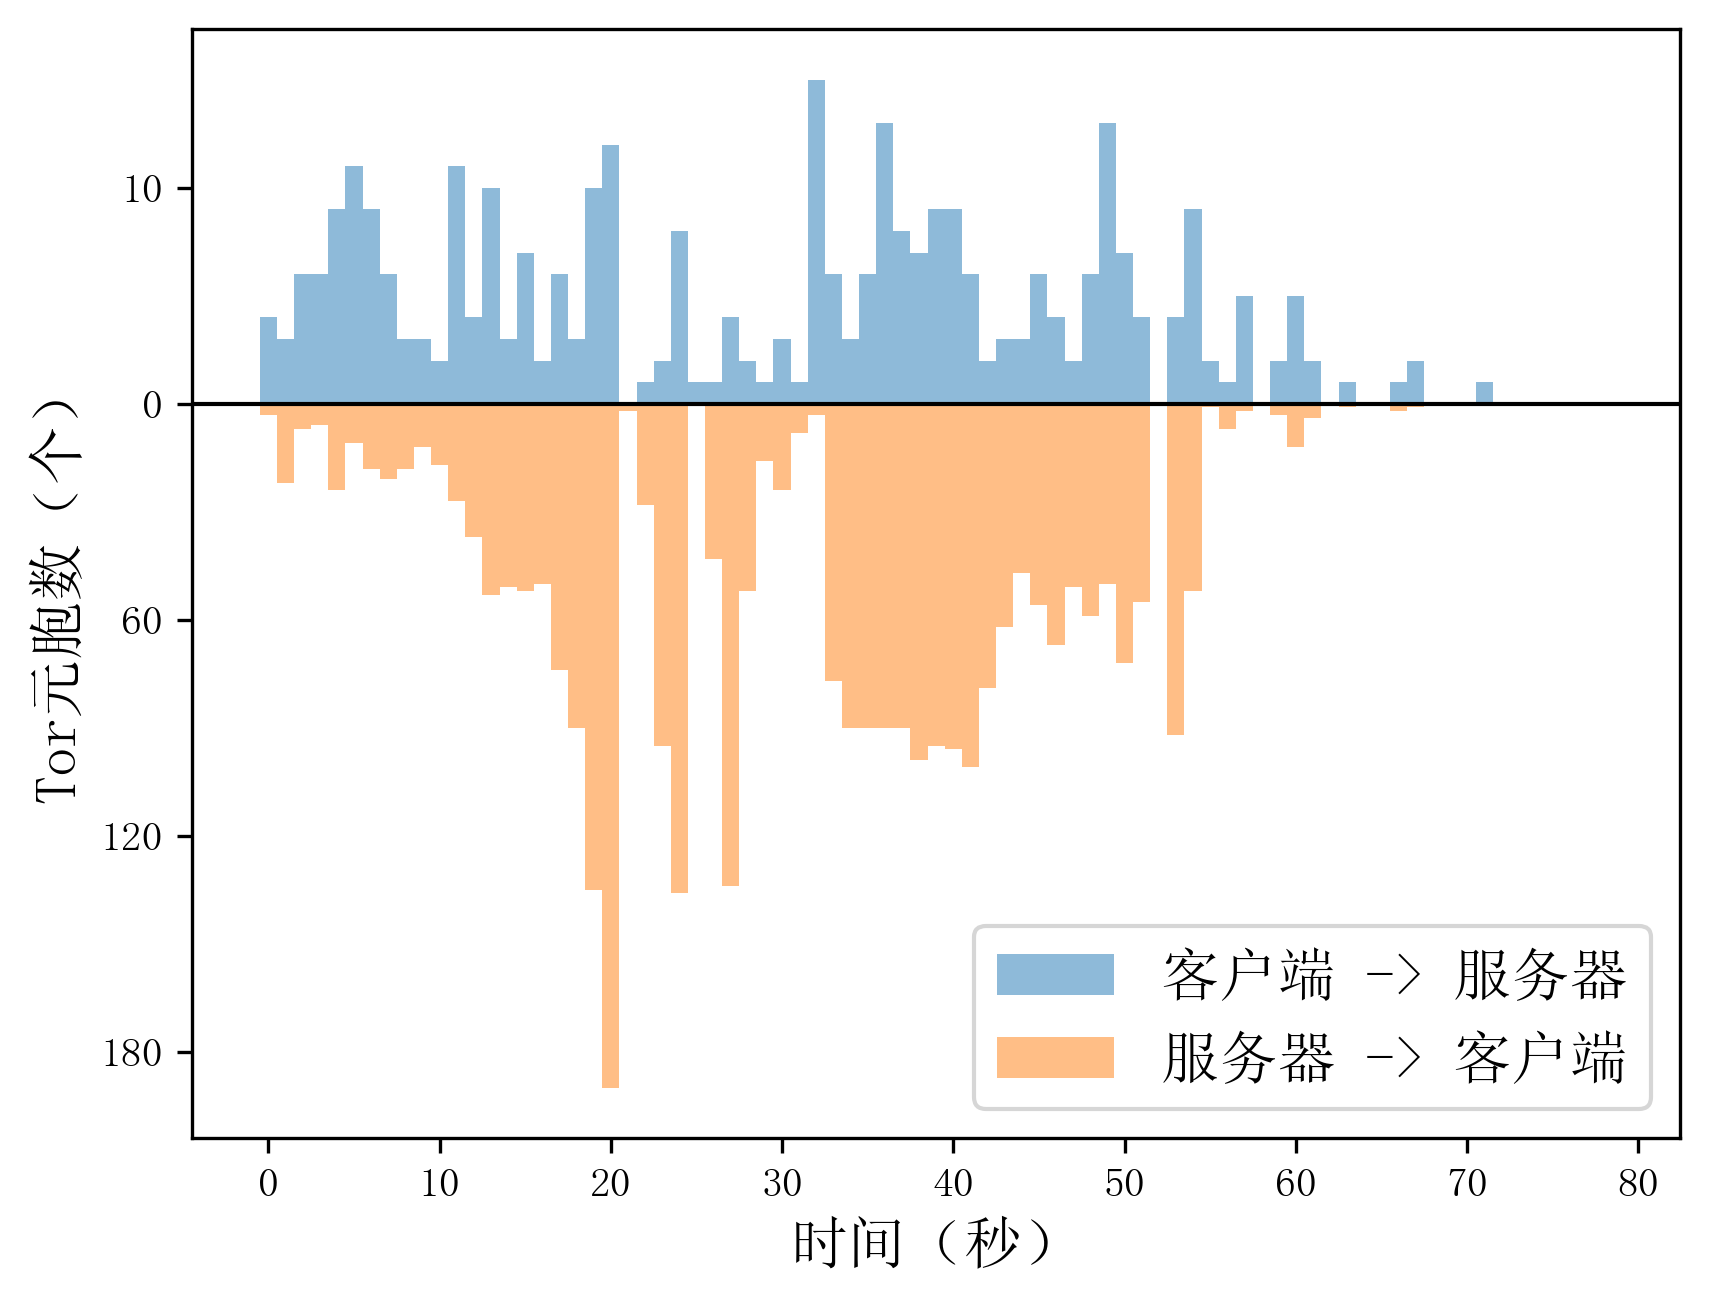

In [15]:
k = np.random.randint(len(labels))
k = 353
trace, label = traces[k], labels[k]
print(k, label)

fig, ax = plt.subplots(dpi=300)
t_out = trace[trace[:, 1] > 0][:, 0]
t_in = trace[trace[:, 1] < 0][:, 0]
x_range = int(trace[-1, 0] - trace[0, 0])
h_out = np.histogram(t_out, bins=range(x_range + 1))
h_in = np.histogram(t_in, bins=range(x_range + 1))
bar_out = ax.bar(
    h_out[1][:-1],
    h_out[0],
    width=np.diff(h_out[1]),
    alpha=0.5,
    label="客户端 -> 服务器",
    # color="blue",
)
bar_in = ax.bar(
    h_in[1][:-1],
    -h_in[0] / 6,
    width=np.diff(h_in[1]),
    alpha=0.5,
    label="服务器 -> 客户端",
    # color="red",
)
# 设置图例
ax.legend()
# 设置x轴和y轴标签
ax.set_ylabel("Tor元胞数（个）", fontsize=14)
ax.set_xlabel("时间（秒）", fontsize=14)
from matplotlib.ticker import FixedLocator

# 重新设置第四象限y轴刻度标签为负值的绝对值
ticks = ax.get_yticks()
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.set_yticklabels([str(int(abs(6 * tick))) if tick < 0 else str(int(abs(tick))) for tick in ticks])

# 在y轴0刻度线处加一条黑色实线
ax.axhline(0, color="black", linewidth=1)
# plt.hist([t_in, t_out], label=["Server -> Client", "Client -> Serer"], bins=x_range)
# plt.hist(t_in, label=["Server -> Client"], bins=x_range)
plt.legend(fontsize=14)
# plt.show()
plt.savefig("trace.pdf")